# Model Selection

- Importar librerías
- Cargar Datos del círculo
- Implementar validación cruzada
    - reportar error 
- Seleccionar una buena topología de red
    - uso de pipeline

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def accuracy(X,y):
    errores=0
    for modelo,realidad in zip(model.predict(X),y):
        errores+=abs(modelo-realidad)
    return 1.0*errores/len(y)

In [3]:
df = pd.read_csv("/Users/fesponda/Itam/Itam/Clases Itam/RiskMath/RiskDistrib/Datos/circulo2.csv")
X_train, X_test, y_train, y_test = train_test_split(df[['X1','X2']],df['class'], test_size=0.33)
X_train=np.asarray(X_train)
X_test=np.asarray(X_test)
y_train=np.asarray(y_train)
y_test=np.asarray(y_test)

In [4]:
model=MLPClassifier( hidden_layer_sizes=(100,10),max_iter=1000)


In [5]:
scores = cross_val_score(model, X_train, y_train, cv=5)
print(np.mean(1-scores),np.std(1-scores))
model.fit(X_train,y_train)
print accuracy(X_test,y_test)

(0.3926664156031901, 0.04853022549310184)
0.444722361181


Ahora normalizado

In [6]:
df = pd.read_csv("/Users/fesponda/Itam/Itam/Clases Itam/RiskMath/RiskDistrib/Datos/circulo2.csv")
X_train, X_test, y_train, y_test = train_test_split(df[['X1','X2']],df['class'], test_size=0.33)

In [7]:
scalerX = StandardScaler()
scalerX=scalerX.fit(X_train)
X_train=scalerX.transform(X_train)


In [8]:
model=MLPClassifier( hidden_layer_sizes=(100,10),max_iter=1000) # Esta mal porque escale antes
scores = cross_val_score(model, X_train, y_train, cv=5)
print(np.mean(1-scores),np.std(1-scores))


(0.009611689211836638, 0.004078091926303502)


In [9]:
model.fit(X_train,y_train)
X_test=scalerX.transform(X_test)
print 1-model.score(X_test,y_test),accuracy(X_test,y_test)

0.008504252126062983 0.00850425212606


Crear un pipeline

In [10]:
df = pd.read_csv("/Users/fesponda/Itam/Itam/Clases Itam/RiskMath/RiskDistrib/Datos/circulo.csv")
X_train, X_test, y_train, y_test = train_test_split(df[['X1','X2']],df['class'], test_size=0.33,random_state=25)

In [11]:
scalerX = StandardScaler()
red=MLPClassifier( hidden_layer_sizes=(100,10),max_iter=1000)

In [12]:
model=Pipeline([('scaler', scalerX), ('RN', red)])
scores = cross_val_score(model, X_train, y_train, cv=5)
print(np.mean(1-scores),np.std(1-scores))
model.fit(X_train,y_train)
print 1-model.score(X_test,y_test)


(0.023903041185052175, 0.01520780929500957)
0.024242424242424288


Seleccionar topología

In [13]:
df = pd.read_csv("/Users/fesponda/Itam/Itam/Clases Itam/RiskMath/RiskDistrib/Datos/circulo2.csv")
X_train, X_test, y_train, y_test = train_test_split(df[['X1','X2']],df['class'], test_size=0.33,random_state=25)


In [14]:
trainerr=[]
testerr=[]
cverror=[]
params=[10,100,500,1000]

for i in params:
    scalerX = StandardScaler()
    red=MLPClassifier( hidden_layer_sizes=(i,10),max_iter=1000)
    model=Pipeline([('scaler', scalerX), ('RN', red)])
    scores = cross_val_score(model, X_train, y_train, cv=5)
    cverror.append(np.mean(1-scores))

    #Las siguientes lineas no son necesarias, son para fines ilustrativos
    model=model.fit(X_train,y_train)
    trainerr.append(np.mean(1-model.score(X_train,y_train)))
    testerr.append(np.mean(1-model.score(X_test,y_test))) # esto en realidad no va aqui. Es solo para ver como cambia por pedagogía
    

    

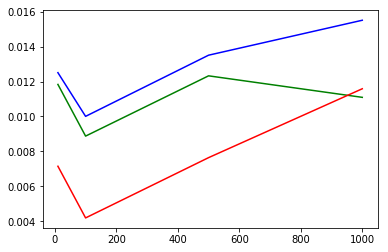

In [15]:


plt.plot(params,testerr,c='b')
plt.plot(params,cverror,c='g')
plt.plot(params,trainerr,c='r')

In [16]:
print min(zip(cverror,params),key=lambda x: x[0])
layer=min(zip(cverror,params),key=lambda x: x[0])[1]

(0.008874284013533119, 100)


In [17]:
scalerX = StandardScaler()
red=MLPClassifier( hidden_layer_sizes=(layer,50))
model=Pipeline([('scaler', scalerX), ('RN', red)])
model=model.fit(X_train,y_train)

In [18]:
1-model.score(X_test,y_test)

0.015007503751875984

In [19]:
trainerr

[0.0071481390189795935,
 0.004190288390436336,
 0.007641114123736803,
 0.011584914961794479]

In [20]:
cverror

[0.011832986096347642,
 0.008874284013533119,
 0.012324989522149244,
 0.011093462428553202]

In [21]:
testerr

[0.012506253126563283,
 0.010005002501250582,
 0.013506753376688385,
 0.01550775387693848]